Welcome to Sloan's python stuff to produce a reasonably nice graph for the [WL] labs. We will read in data, plot it, fit a linear function and then output the graph as a graphics file, here a png file.

In [1]:
## Some code that imports all the various sub-routines that we will need. Leave alone.

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
%config InlineBackend.figure_format = 'retina'
import pandas as pd

In [2]:
### read in ALL the excel file and save its data to variable "data"

data = pd.read_excel('BoltData.xlsx')

In [3]:
## have a look at the data and print it to the screen.
data

,distance/m,Distnace uncertinty / m,time/s,Time measurment uncertinty / s
0,0,0.02,0.000000,1.004810
1,10,0.02,0.923422,0.637569
2,20,0.02,2.178145,0.382366
3,30,0.02,2.461897,0.911785
4,40,0.02,3.387051,0.198510
5,50,0.02,5.263879,1.152222
6,60,0.02,6.042705,0.161827
7,70,0.02,7.939192,0.732011
8,80,0.02,8.221779,1.267329
9,90,0.02,8.578128,0.590908


In [4]:
## Now we can read in only what items we want and give each column a better name.
data = pd.read_excel('BoltData.xlsx', 
                        names=('distance', 'err_distance', 'time', 'err_time'), 
                        usecols=(0,1,2,3), 
                        skipfooter=12)

In [5]:
## have a look at the dataframe just to make sure we have what we wanted.
data

,distance,err_distance,time,err_time
0,0,0.02,0.000000,1.004810
1,10,0.02,0.923422,0.637569
2,20,0.02,2.178145,0.382366
3,30,0.02,2.461897,0.911785
4,40,0.02,3.387051,0.198510
5,50,0.02,5.263879,1.152222
6,60,0.02,6.042705,0.161827
7,70,0.02,7.939192,0.732011
8,80,0.02,8.221779,1.267329
9,90,0.02,8.578128,0.590908


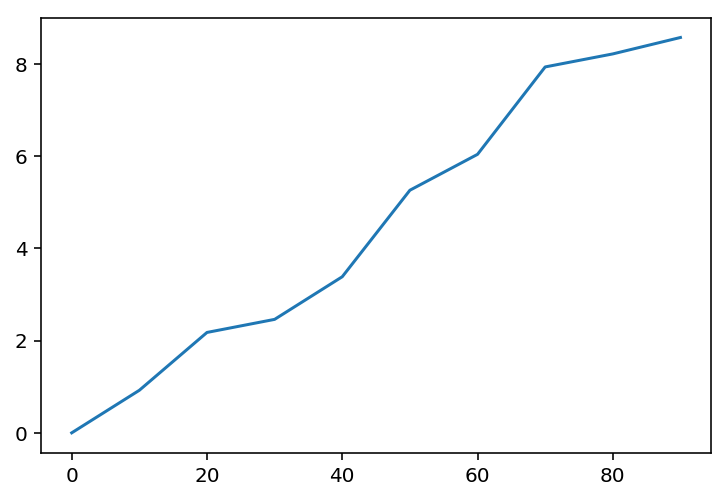

In [6]:
# our first plot quick and easy just to see what the data looks like. plot (x stuff, and y stuff).
plt.plot( data.distance , data.time )

Now we have the data in the computer we can produce a nice graph of it. The code below has various comments to guide as to what's what. You can play with all the various settings to change the graph. Just keeping clicking the "run" button to see what your new version looks like. It you want more advanced stuff then you'll need to do more reading. See the help for matplotlib and have a look at the tutorials: http://blogs.bath.ac.uk/python/data-analysis-with-jupyter-notebooks/

/Users/vs522/anaconda3/envs/astroconda/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


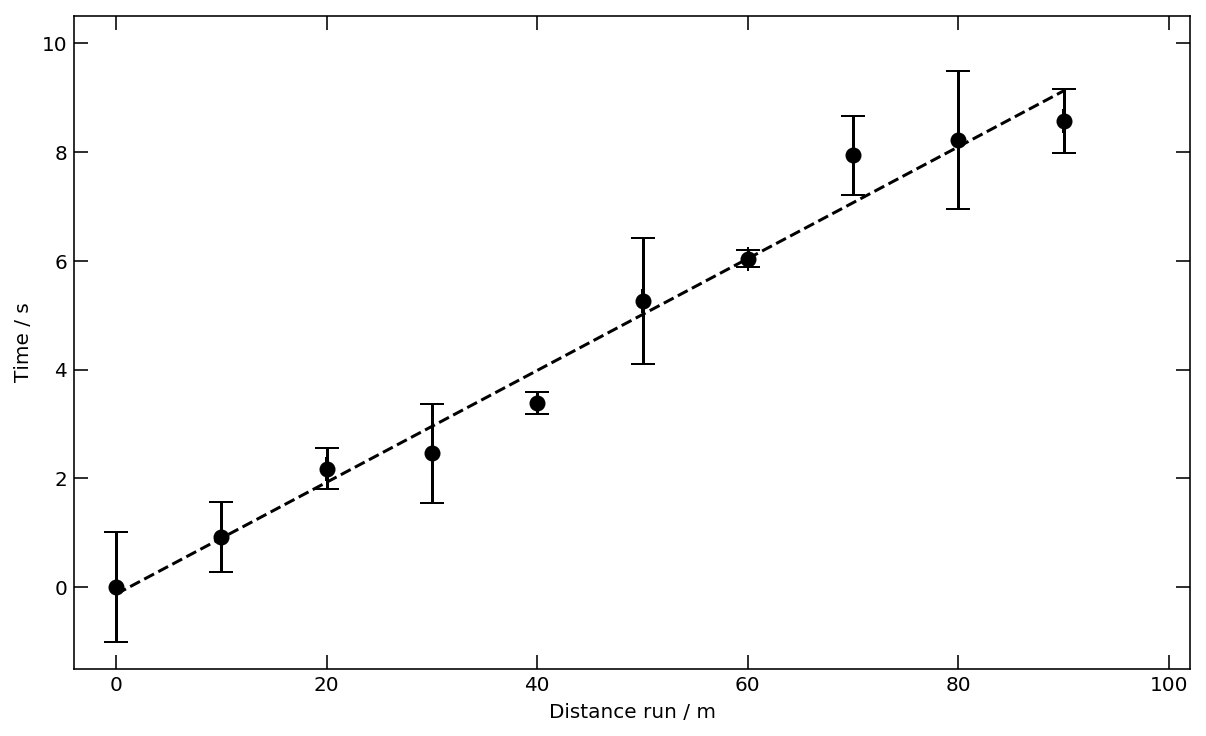

In [7]:
# Create a "figure" and set its aspect ratio. Play with the numbers to make it square, or long or short. 
fig = plt.figure(figsize=(10,6))

# Here we only want one plot in the figure to a 1 by 1 set of plots and this is number 1. Leave alone for now. 
ax = fig.add_subplot(111)

# This nest bit does a lot of work and plots a graph with error bars.
ax.errorbar(data.distance,           # x coordinates
             data.time,              # y coordinates
             xerr=data.err_distance, # x errors
             yerr=data.err_time,     # y errors
             marker='o',             # marker used is a cicle 'o'. Could be crosses 'x', or squares 's', or 'none'
             markersize = 7,        # marker size
             color='black',          # overall colour I think
             ecolor='black',         # edge colour for you marker
             markerfacecolor='black',
             linestyle='none',       # no line joining markers, could be a line '-', or a dashed line '--'
             capsize=6,              # width of the end bit of the error bars, not too small nor too big please.
             )

plt.xlabel('Distance run / m')       # You can use Latex here is you wish, e.g., 'Distance run / 10$^{-3}$ km'
plt.ylabel('Time / s')

plt.xlim(-4, 102)                    # extent of the x axis, smallest to largest.
plt.ylim(-1.5, 10.5)                 

plt.tick_params(direction='in',      # I like 'in', could be 'out' or both 'inout'
                length=7,            # A reasonable length
                bottom='on',         # I want ticks on the bottom axes
                left='on',
                top='on',
                right='on',
                
               )
plt.rcParams.update({'font.size':15})   # A decent font size so the text is readible. 
                                        # You may have to play with the aspect ration aobe and this to get a nice 
                                        # looking figure in your report.

def line(x, slope, intercept):          # Set up the linear fitting - don't ammend
    return slope*x + intercept          # More set up, leave alone.

# Next few line, fits a line to the (x data, and y data) no need to change things.
popt, pcov = curve_fit(line,data.distance,data.time)
slope = popt[0]
intercept = popt[1]
err_slope = np.sqrt(float(pcov[0][0]))
err_intercept = np.sqrt(float(pcov[1][1]))

# Plot the linear fit to the graph, generate coordinates by working out the y coordinates for each 
# x-value you have measured. A bit of a poor way of doing it but nevermind.
plt.plot(data.distance, data.distance*slope+intercept, 
         linestyle='--',
         color='black')

plt.show() # Display the graph below.

In [8]:
# Print to the screen the value of the slope and the error and then the intercept and the error.
print('Slope: {0:.3f} +- {1:.3f}'.format(slope, err_slope))
print('Intercept: {0:.3f} +- {1:.3f}'.format(intercept, err_intercept))

Slope: 0.103 +- 0.005
Intercept: -0.129 +- 0.280


In [9]:
fig.savefig('Basic.png', dpi=300) # save the graph to a file.